# Extraction

This notebook provides some commands to quickly extract catchment averaged data or subsetted gridded data from the model inputs or outputs

The following aspects are covered:
    
    1. Import required libraries
    2. Extraction of aggregated catchment data to pandas dataframes
    3. Extract gridded datasets
    4. Exercises
        4.1 Extract your own catchment
        4.2 Save the array to netCDF

### 1. Import required libraries

In [6]:
from awrams.utils.processing.extract import extract_from_filemanager
from awrams.utils.io.data_mapping import SplitFileManager


from awrams.utils.gis import ShapefileDB, CATCHMENT_SHAPEFILE
catchments = ShapefileDB(CATCHMENT_SHAPEFILE)

import awrams.utils.datetools as dt
from awrams.utils import extents
from awrams.utils.settings import TRAINING_DATA_PATH



import os

# Plotting
from matplotlib import pyplot as plt
%matplotlib inline

### 2.  Extract and spatially aggregate catchments

In [7]:
import os
os.getcwd()

'/data/cwd_awra_data/AWRAMSI/IWRM_0042_WP3/GIT/Avi/new_cms/awrams_cm/Training/Extraction'

In [8]:
training_folder = TRAINING_DATA_PATH

In [10]:
# Capture files of the same variable

var_name = 'rain_day'

data_path = training_folder + 'climate/BOM_climate/rain_day'
pattern = data_path + '/%s*' % var_name

sfm = SplitFileManager.open_existing(data_path,pattern,var_name) # The sfm tool needs the full path to work

In [11]:
# Specify period, parent extent  and collate all extents

period = dt.dates('jul 2010 - jun 2011')

georef = sfm.get_extent()

extent_map = {'204007':catchments.get_extent_by_field('StationID','204007',georef),
              '421103':catchments.get_extent_by_field('StationID','421103',georef),
              '003303':catchments.get_extent_by_field('StationID','003303',georef)}

In [12]:
# Extract the data

df = extract_from_filemanager(sfm,
             extent_map,
             period)
df

,003303,204007,421103
2010-07-01,0,0.0661474,0
2010-07-02,0.09362,0.127078,0
2010-07-03,9.29598,11.8724,6.81642
2010-07-04,0.0705856,0.00897367,0.0924056
2010-07-05,0,0.00469692,0.000939141
2010-07-06,0,1.40813,4.91337
2010-07-07,11.779,0.900489,0.192406
2010-07-08,4.57769,2.06553,0.0792526
2010-07-09,0.353078,0.291047,0
2010-07-10,5.54472e-13,0.392481,0


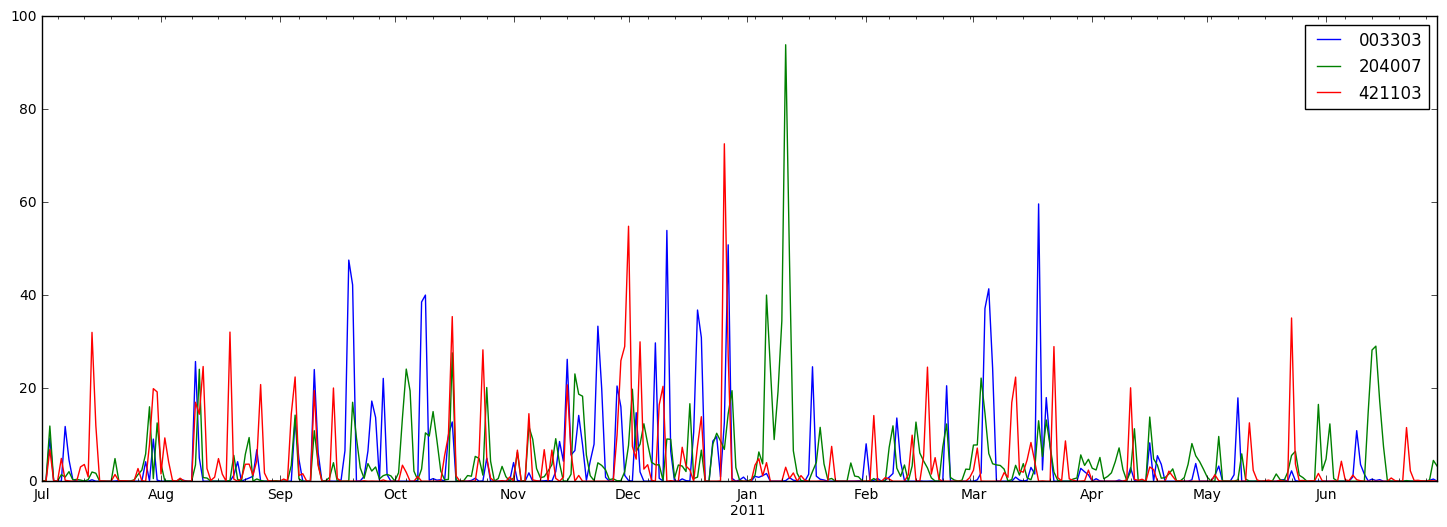

In [13]:
ax = plt.figure(figsize=(18,6)).gca()
df.plot(ax=ax)

### 3. Extract catchment gridded data

Requires osgeo.ogr to process shapefiles

In [14]:
## Specify date

period = dt.dates('jul 2010')

In [15]:
# Specify catchment

catchment = extent_map['421103']
catchment.cell_count

9

In [16]:
data = sfm.get_data(period,catchment)

sfm.close_all()

data.shape,catchment.cell_count # You will note that the data extracted is for the rectangle containing the catchment

((31, 4, 3), 9)

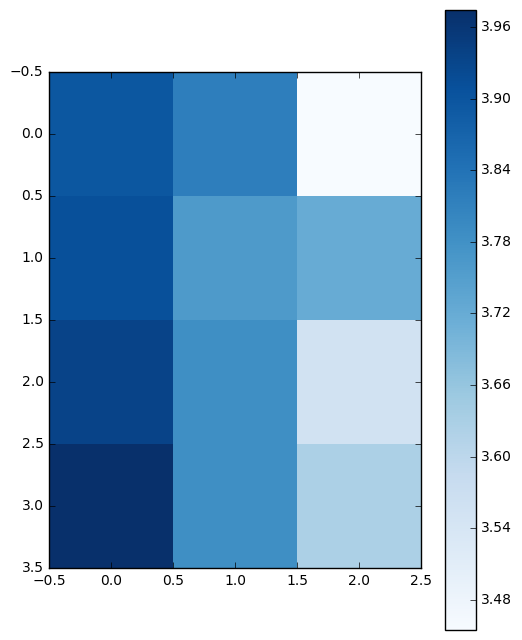

In [17]:
plt.figure(figsize=(6,8))
im = plt.imshow(data.mean(axis=0),interpolation='None',cmap=plt.get_cmap('Blues'))
plt.colorbar(im)



In [18]:
type(data)

numpy.ndarray

In [19]:
## On the list to do: Insert shapefile over the grid for visualisation purposes
## At the moment can be done using a bit of Python

### 4. Exercise

#### 4.1 Extract any extent from your own shapefile
Put together the extent definition from the fundamentals and undertake extraction process as above

#### 4.2  Save data into netcdf file
Follow: http://pyhogs.github.io/intro_netcdf4.html